#  Customer Churn Prediction to enhance Retention Strategies | Telecom Churn Dataset

**1.Objective:**

To analyze customer churn in the telecom industry, identify key drivers, and build predictive models to forecast churn, enabling targeted retention strategies. Churn is a significant challenge across industries such as gaming, credit cards, and entertainment/DTH services. Using the Telecom Churn Prediction dataset, I will investigate the main causes of churn and develop models to predict customer attrition.

**What is Customer Churn?**
Customer churn refers to the percentage of customers lost during a specific period. For instance, losing 10 out of 100 customers results in a 10% churn rate. Reducing churn is crucial for sustainable growth, as high churn forces businesses to constantly acquire new customers. While some churn is inevitable, minimizing it is key for profitability.

In the telecom industry, where customers can easily switch providers, the annual churn rate typically ranges from 15-25%. By predicting churn, companies can focus retention efforts on high-risk customers, improving cost-efficiency and fostering long-term loyalty in this competitive market.

2. Copy the data dictionary as is

3. I conclude that:
- 75% of customers have a tenure of less than 55 months.
- The average tenure is approximately 32 months.
- The mean monthly charges are around 64.76 USD, with 25% of customers paying over 89.85 USD.

4. The data distribution is not balanced around 50:50, indicating that it is an 'Imbalanced Dataset'.
Next, let's check for any missing values in the dataset.

5. I don't see any missing values at first glance. Since many columns are of object datatype, I need to convert them into float or integer values to accurately identify any potential null values. I can use the to_numeric method for this conversion and check again for missing values.

6. There are 11 missing values in the TotalCharges column. I will check these records to understand the issue further.

7. As I can see from the dataframe, the customers with a tenure of 0 are the ones with blank values in the TotalCharges column. I will quickly check the dataframe where the tenure is 0 to investigate further.

8. As both dataframes match, I can conclude that the missing values in the TotalCharges column are due to customers who have not yet made any payments, as they are new customers and have not churned yet.

Since the percentage of these records is very low (~0.156%) compared to the entire dataset, it is safe to drop them, as they won't have a significant impact on the analysis.

9. Since Tenure is a specific number, visualizing it directly could be challenging. To make it more interpretable, I will divide the tenure into bins and assign customers to groups. For example:
- Tenure < 12 months will be grouped as 0-1 years.
- Tenure between 13-24 months will be grouped as 1-2 years, and so on.

This will help in simplifying the data and make it easier to visualize.

10. I notice that customers with less than a year of tenure are more likely to churn, while those who have been with the company the longest are less likely to churn. Additionally, there are more customers with a monthly tenure than with other tenure ranges.

Since we've already transformed the tenure column into tenure_group, I will now remove the tenure and

In [12]:
#EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#Model Building Libraries
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#Parameters for plots
rcParams['figure.figsize'] = 8,6
sns.set_style('darkgrid')
rcParams['axes.titlepad']=15
RB = ["#123ea6", "#e63707"]
sns.set_palette(RB)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
#Loading the Dataset
df_base= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",delimiter=',')

In [16]:
df_base.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df_base.shape


(7043, 21)

In [20]:
df_base.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [22]:
df_base.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Observations:**

-  **Gender:** The ratio is almost similar, so gender alone may not be an important feature, but it could be valuable when combined with other features.

- **SeniorCitizen:** Senior citizens have a high churn rate. If a customer is a senior citizen, they are more likely to churn.

- **Partner**: Customers with partners are more likely to churn.

- **Dependents:** Customers with dependents are less likely to churn.

- **PhoneService:** Customers with phone service are more likely to churn.

- **MultipleLines:** There is not much of an effect.

- **InternetService:** Customers with fiber optic internet are more likely to churn, possibly due to high costs.

- **OnlineSecurity:** Customers with online security are less likely to churn compared to those without.

- **OnlineBackup:** Customers with online backup are less likely to churn.

- **TechSupport:** Customers with tech support or device protection are less likely to churn.

- **StreamingTV/StreamingMovies:** No significant effect, as the company doesn’t charge an additional fee for these services.

- **Contract:** Customers with a contract of one year or more are less likely to churn.

- **PaperlessBilling:** There is no significant effect.

- **PaymentMethod:** Customers paying via electronic check are more likely to churn, while those paying by credit card are less likely to churn.

- **tenure_group:** Customers with less than a year of tenure are more likely to churn, while those who have been with the company the longest are less likely to churn.

Now, I will convert the target variable Churn into a binary numeric value: **Yes = 1**, **No = 0**.

In [25]:
df_base.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'No of Churned Customers')

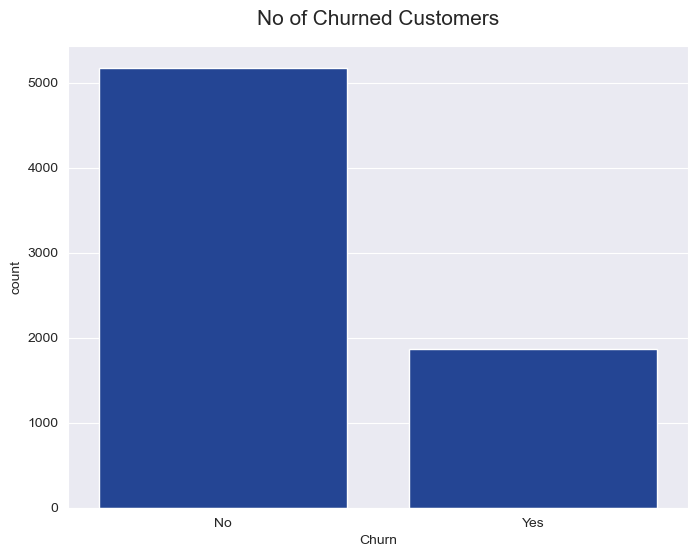

In [27]:
#We can conclude that
#75% of the customers have tenure less than 55 months
#The mean tenure is around 32 months
#The mean monthly charges are roughly around 64.76 USD and 25% customers pay more than 89.85 USD

sns.countplot(x=df_base['Churn'])
plt.title('No of Churned Customers',fontsize=15)


In [28]:
df_base['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [31]:
df_base.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
df= df_base.copy()
df['TotalCharges']=pd.to_numeric(df_base['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [39]:
df[df['tenure']==0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [41]:
#Dropping the null values
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [47]:
df1=df.copy()

df1.drop(['customerID'],axis=1,inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
#The max tenure is 72 months or 6 years
df['tenure'].max() 

72

In [51]:
# Group the tenures in bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range (1,72,12)]
df['tenure_group'] = pd.cut(df['tenure'], range(1,80,12), right=False, labels=labels)

In [53]:
df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

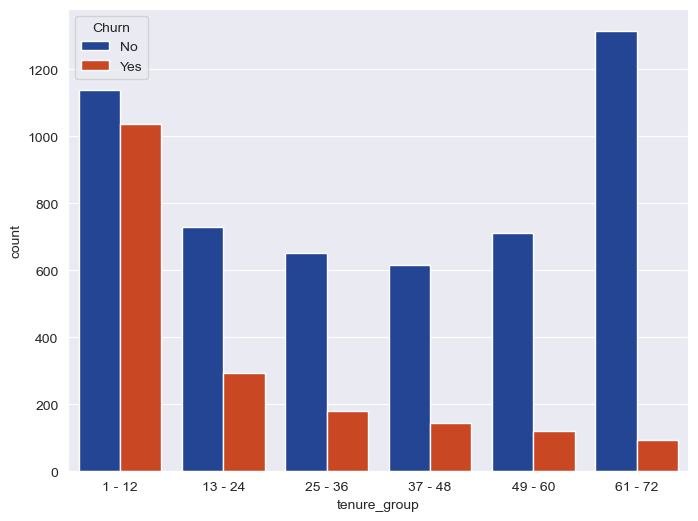

In [55]:
sns.countplot(x=df['tenure_group'],hue='Churn',data=df)

In [57]:
df.drop(['customerID','tenure'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


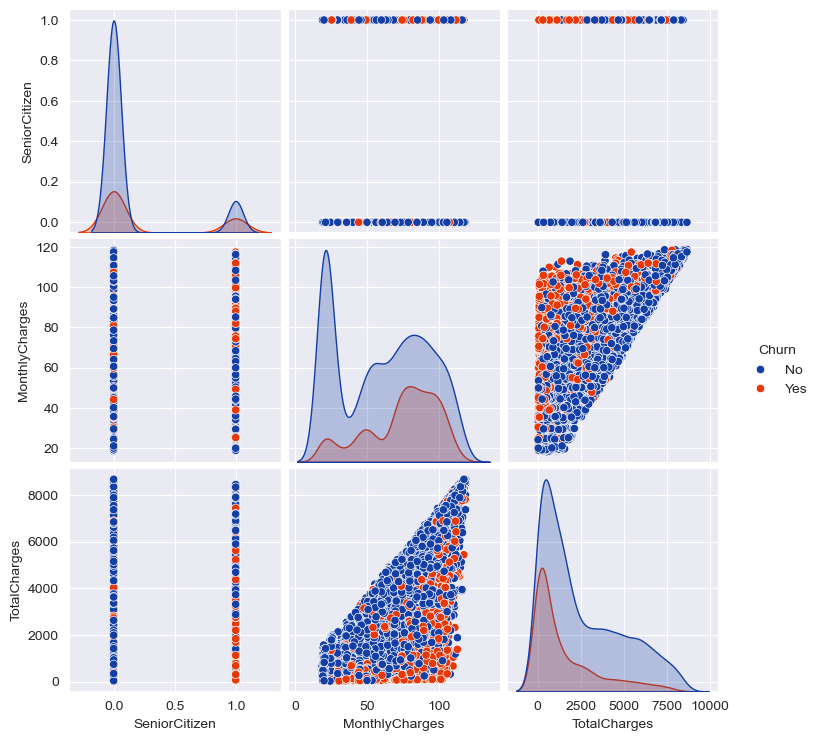

In [59]:
#EXPLORATORY DATA ANALYSIS
#Univariate Analysis
sns.pairplot(df,hue='Churn')

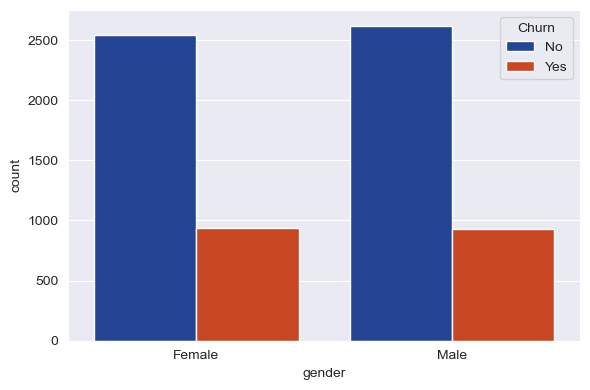

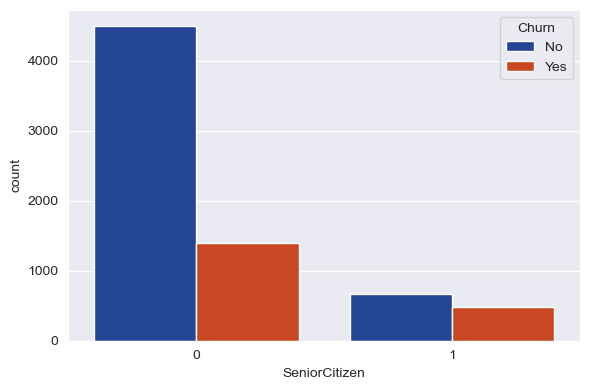

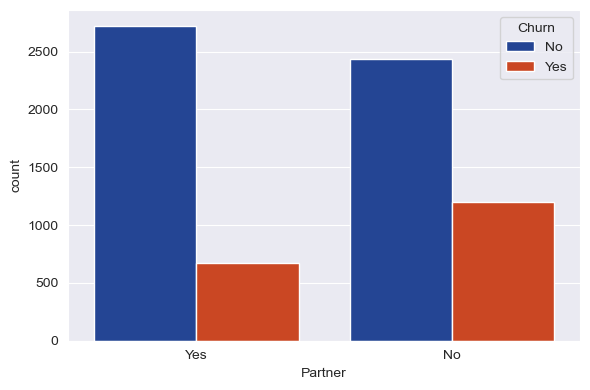

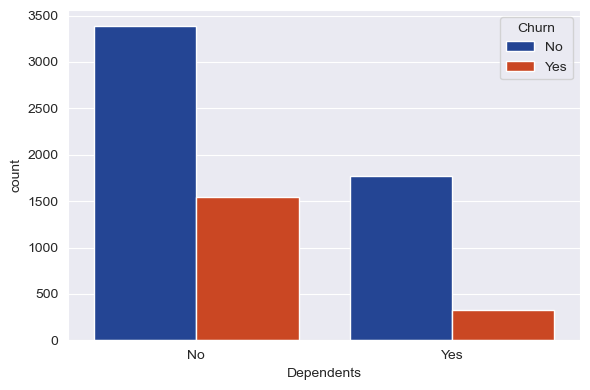

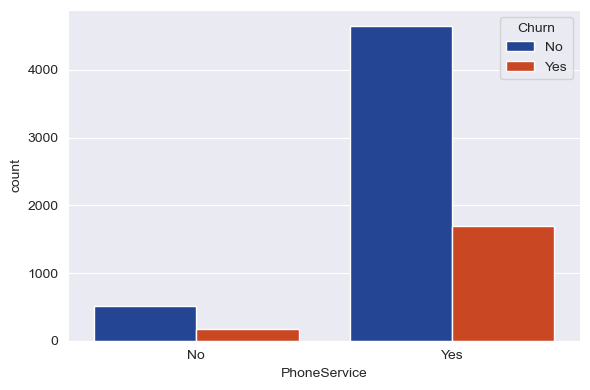

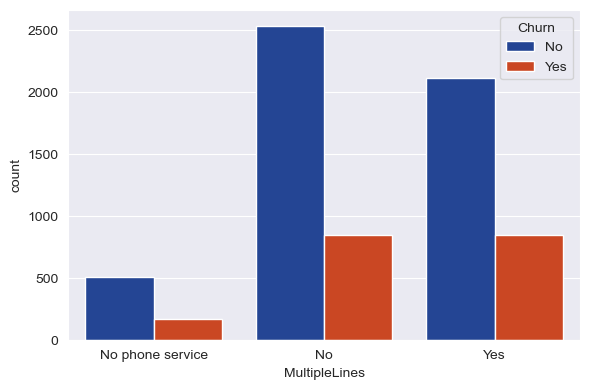

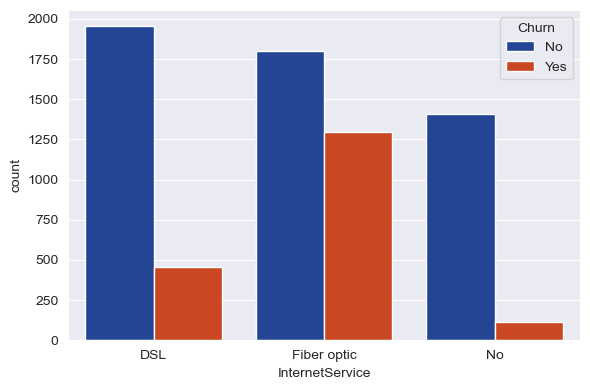

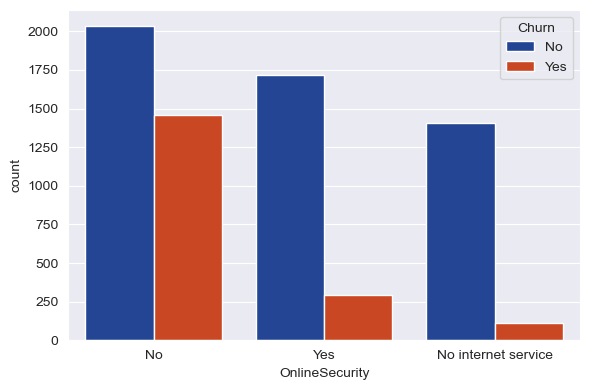

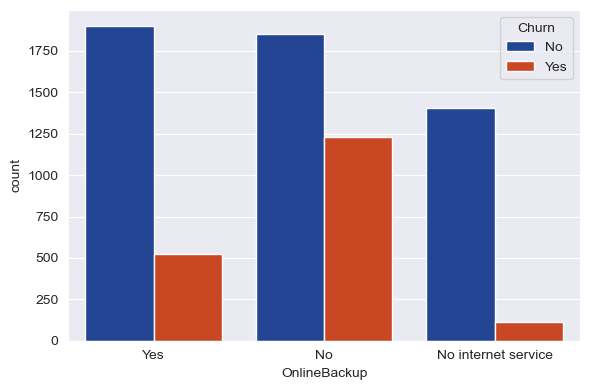

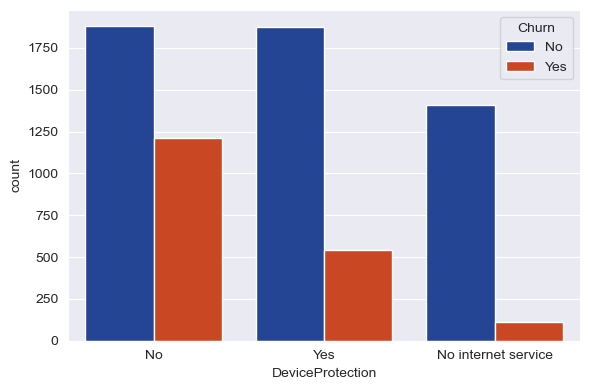

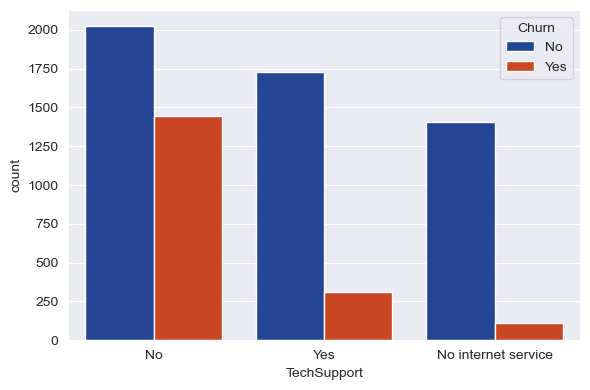

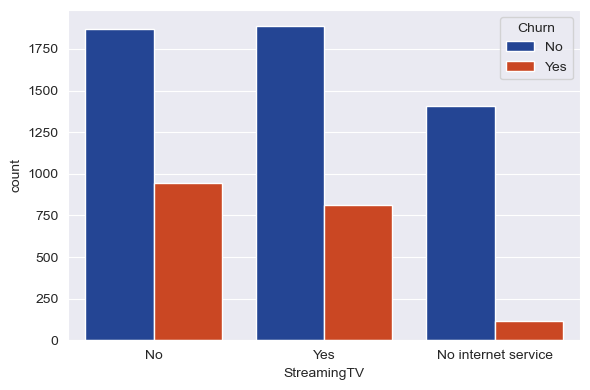

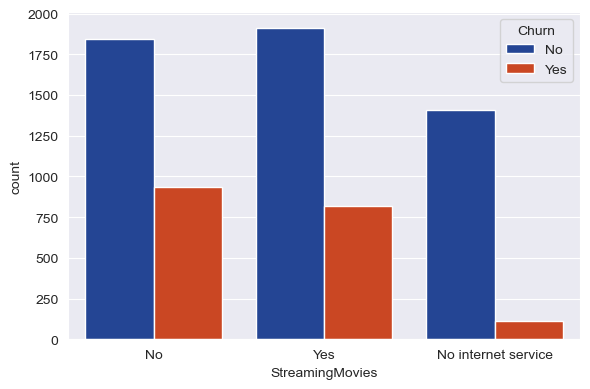

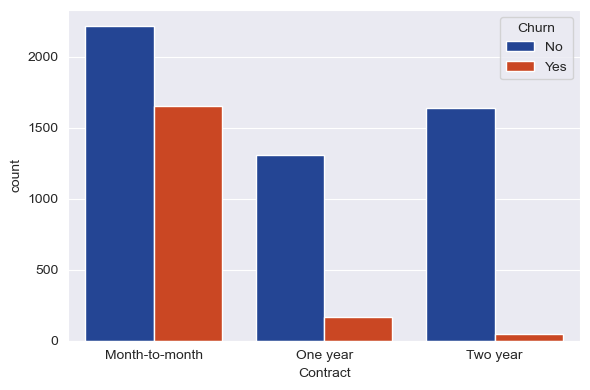

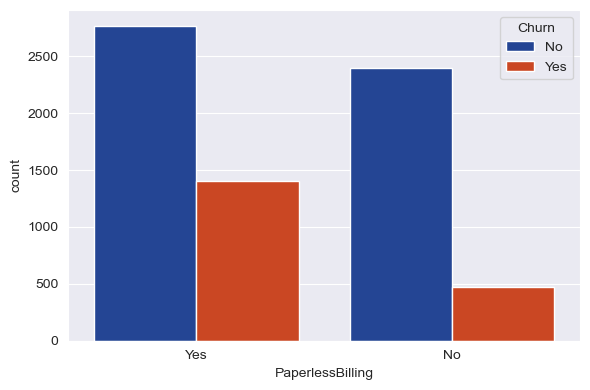

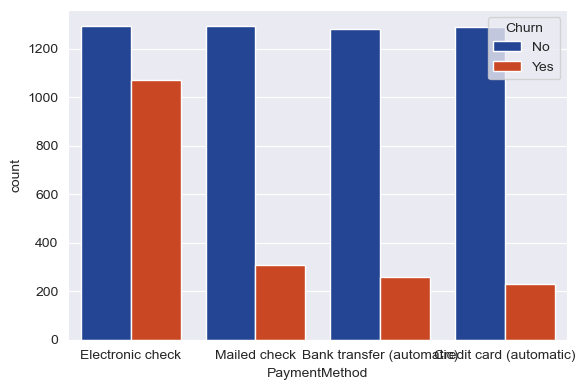

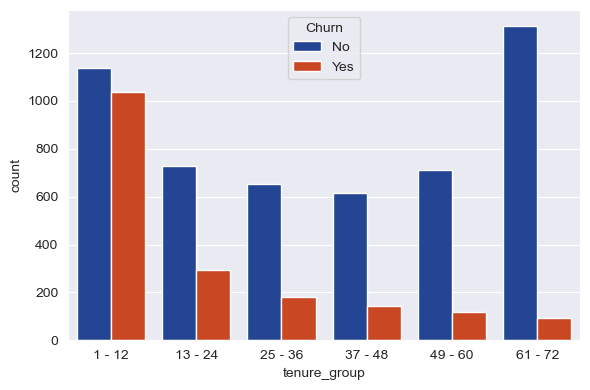

In [60]:
#Plotting the countplot of all important columns to gain insights
for i, predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i,figsize=(6,4))
    sns.countplot(data=df,x=predictor,hue='Churn')
    plt.tight_layout()

In [67]:
#Now lets convert the target variable Churn into a binary numeric value i.e Yes=1, No=0
df['Churn'].replace(["Yes","No"], [1,0],inplace=True)

In [69]:
#One Hot Encoding
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [71]:
100*df[df['SeniorCitizen']==1].shape[0]/df.shape[0]

16.24004550625711

 Only 16% of the customers are senior citizens, meaning the majority of customers in the dataset are younger.

Now, I will check the **pairplot** to visualize the relationships between different features.

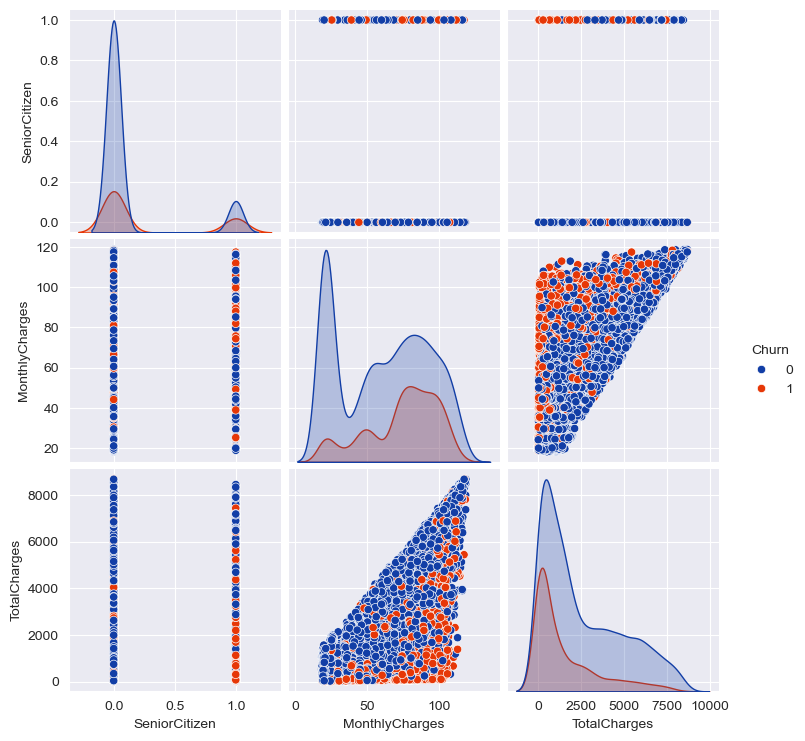

In [75]:
#checking the pairplot
sns.pairplot(df,hue='Churn')

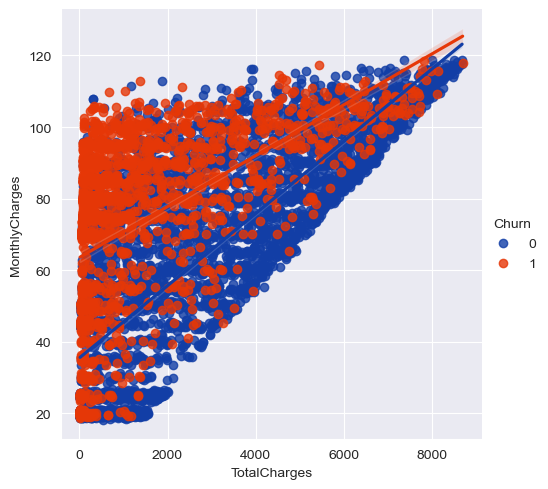

In [76]:
sns.lmplot(x='TotalCharges',y='MonthlyCharges',data=df,hue='Churn')

There is a relationship between MonthlyCharges and TotalCharges, where TotalCharges increases as MonthlyCharges increase, as expected. Now, I will check the **KDE plot** for MonthlyCharges and TotalCharges to visualize their distributions.

C:\Users\sabar\AppData\Local\Temp\ipykernel_5196\2120818580.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='Churn',shade=True)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

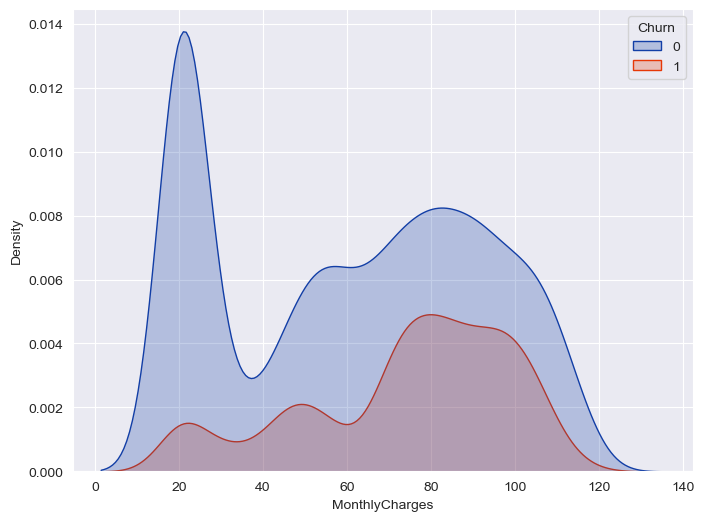

In [78]:
sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='Churn',shade=True)

C:\Users\sabar\AppData\Local\Temp\ipykernel_5196\77734118.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='TotalCharges',hue='Churn',shade=True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

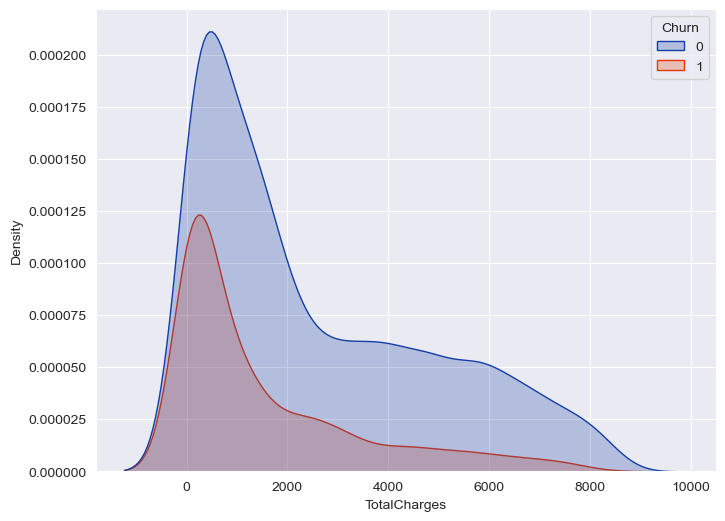

In [82]:
sns.kdeplot(data=df_dummies,x='TotalCharges',hue='Churn',shade=True)

C:\Users\sabar\AppData\Local\Temp\ipykernel_5196\3869418282.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='tenure_group_1 - 12',shade=True)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

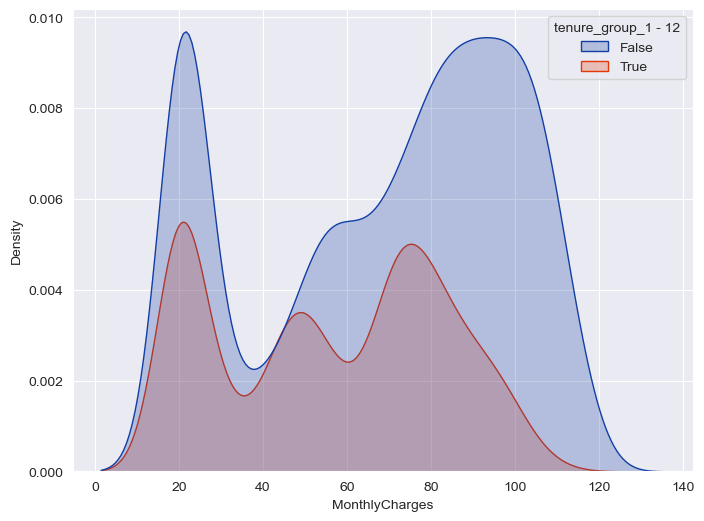

In [84]:
sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='tenure_group_1 - 12',shade=True)

C:\Users\sabar\AppData\Local\Temp\ipykernel_5196\1782551358.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='TotalCharges',hue='tenure_group_1 - 12',shade=True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

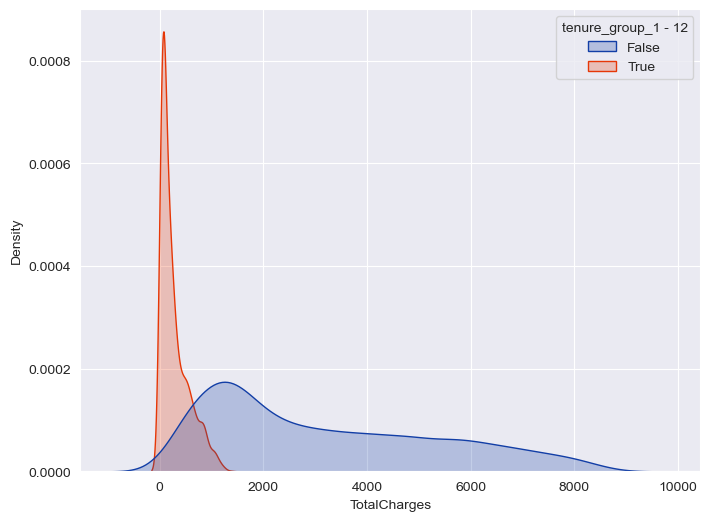

In [86]:
sns.kdeplot(data=df_dummies,x='TotalCharges',hue='tenure_group_1 - 12',shade=True)

 I find that customers are more likely to churn when their monthly and total charges are lower. This could indicate that these customers are less committed to the service, possibly opting for basic plans with fewer features or lower value. Lower charges might also suggest that they are not fully utilizing the service, leading to a higher likelihood of discontinuation. Additionally, customers paying less might not feel as invested, making them more prone to switching providers when faced with competitive offers.

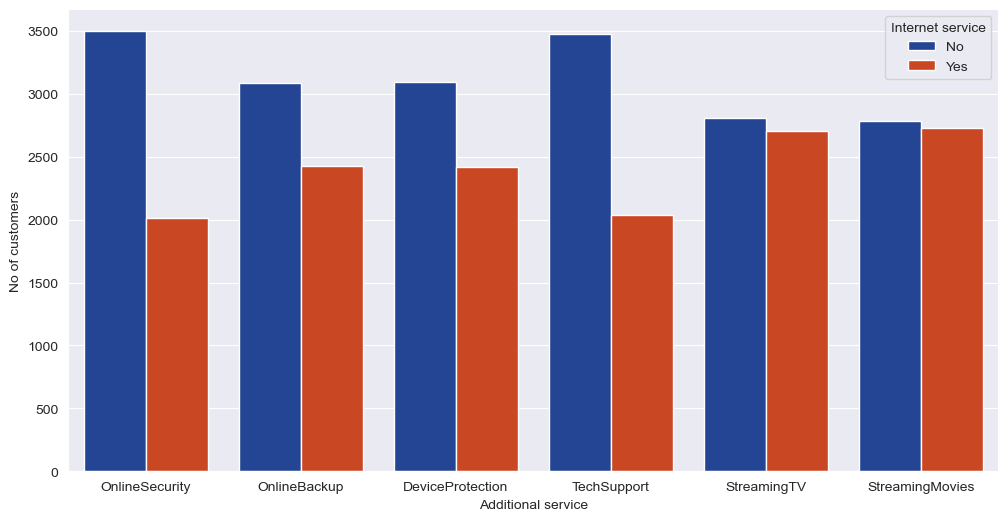

In [89]:
#Now Lets check the additional services offered by the company
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df_service = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Internet service'}, axis=1)
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_service, x='variable', hue='Internet service')
ax.set(xlabel='Additional service', ylabel='No of customers')
plt.show()

Text(0.5, 1.0, 'Positive Correlation')

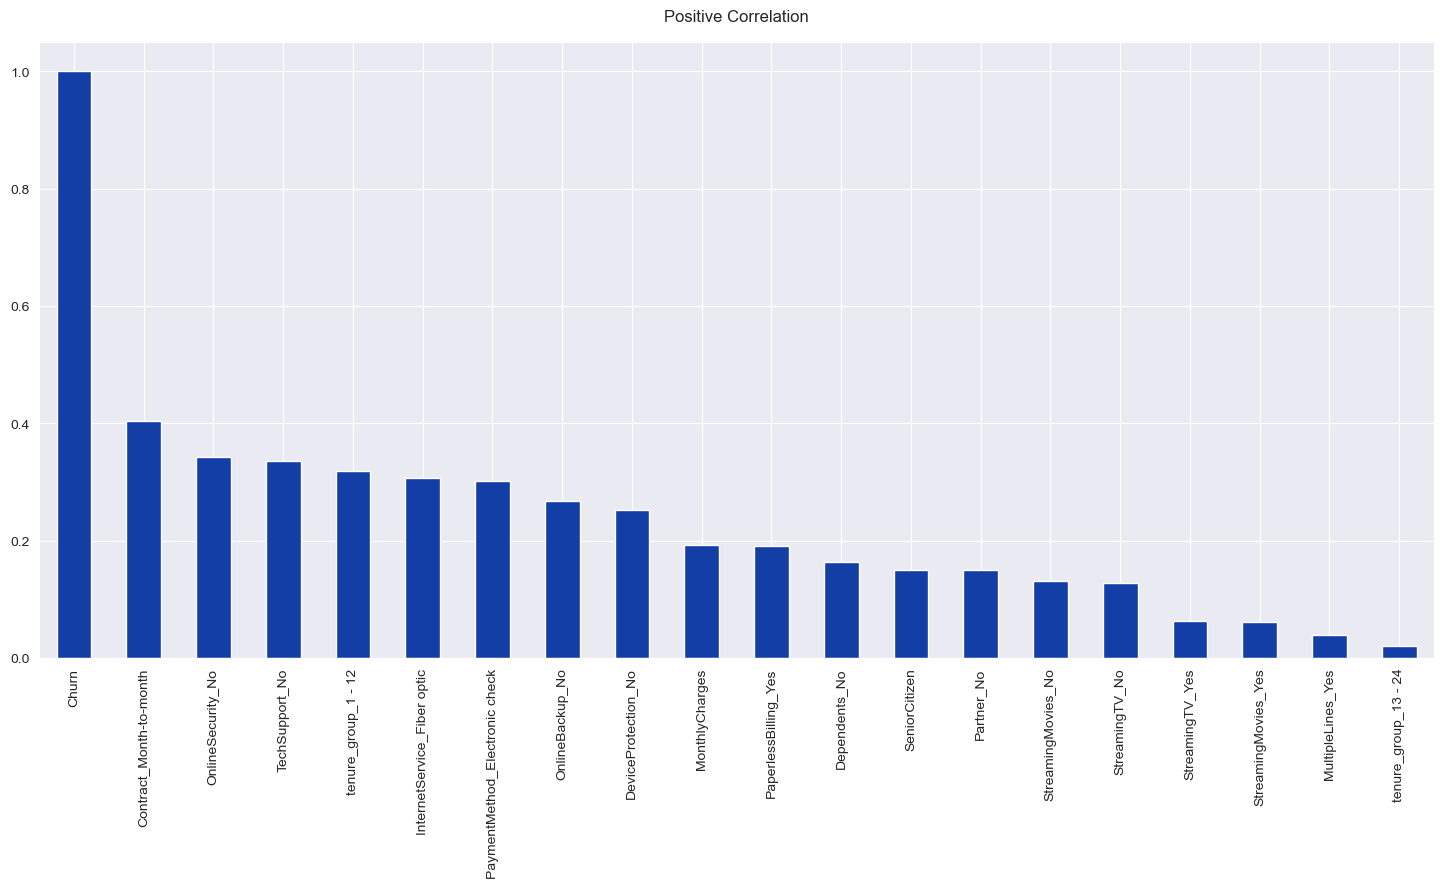

In [91]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[:20].plot(kind='bar')
plt.title('Positive Correlation')

Text(0.5, 1.0, 'Negative Correlation')

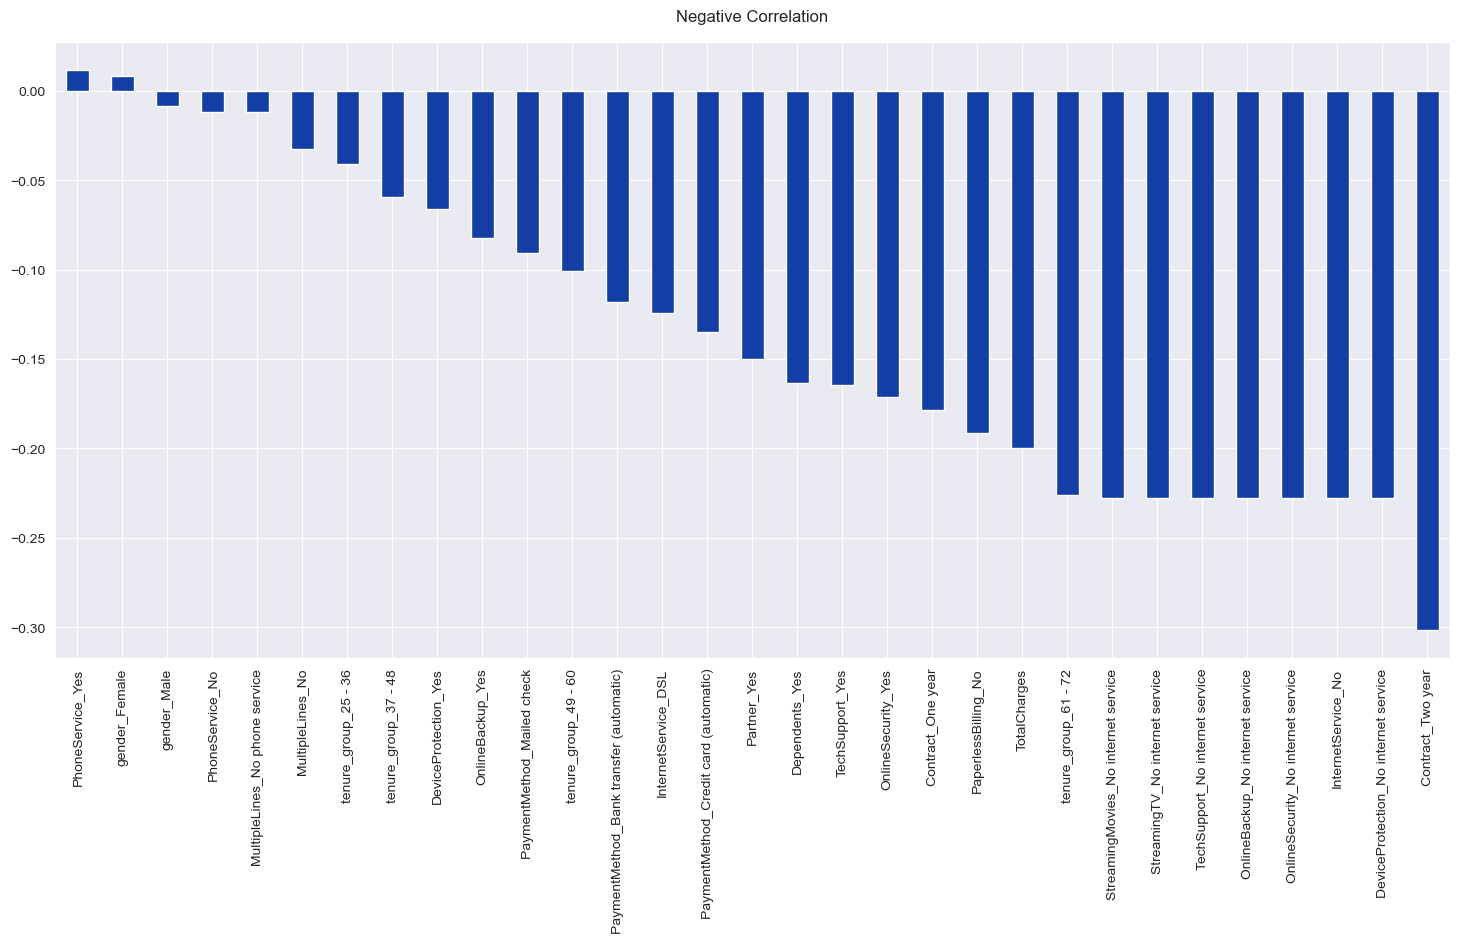

In [93]:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[20:].plot(kind='bar')
plt.title('Negative Correlation')


 I see that customers with shorter tenures are more likely to churn, and their Total Charges tend to be lower due to the brief period they've been with the company. Similarly, customers with low Monthly Charges are more likely to churn, possibly because they are just trying out the service and may switch to another provider if they find a better offer.

<Axes: >

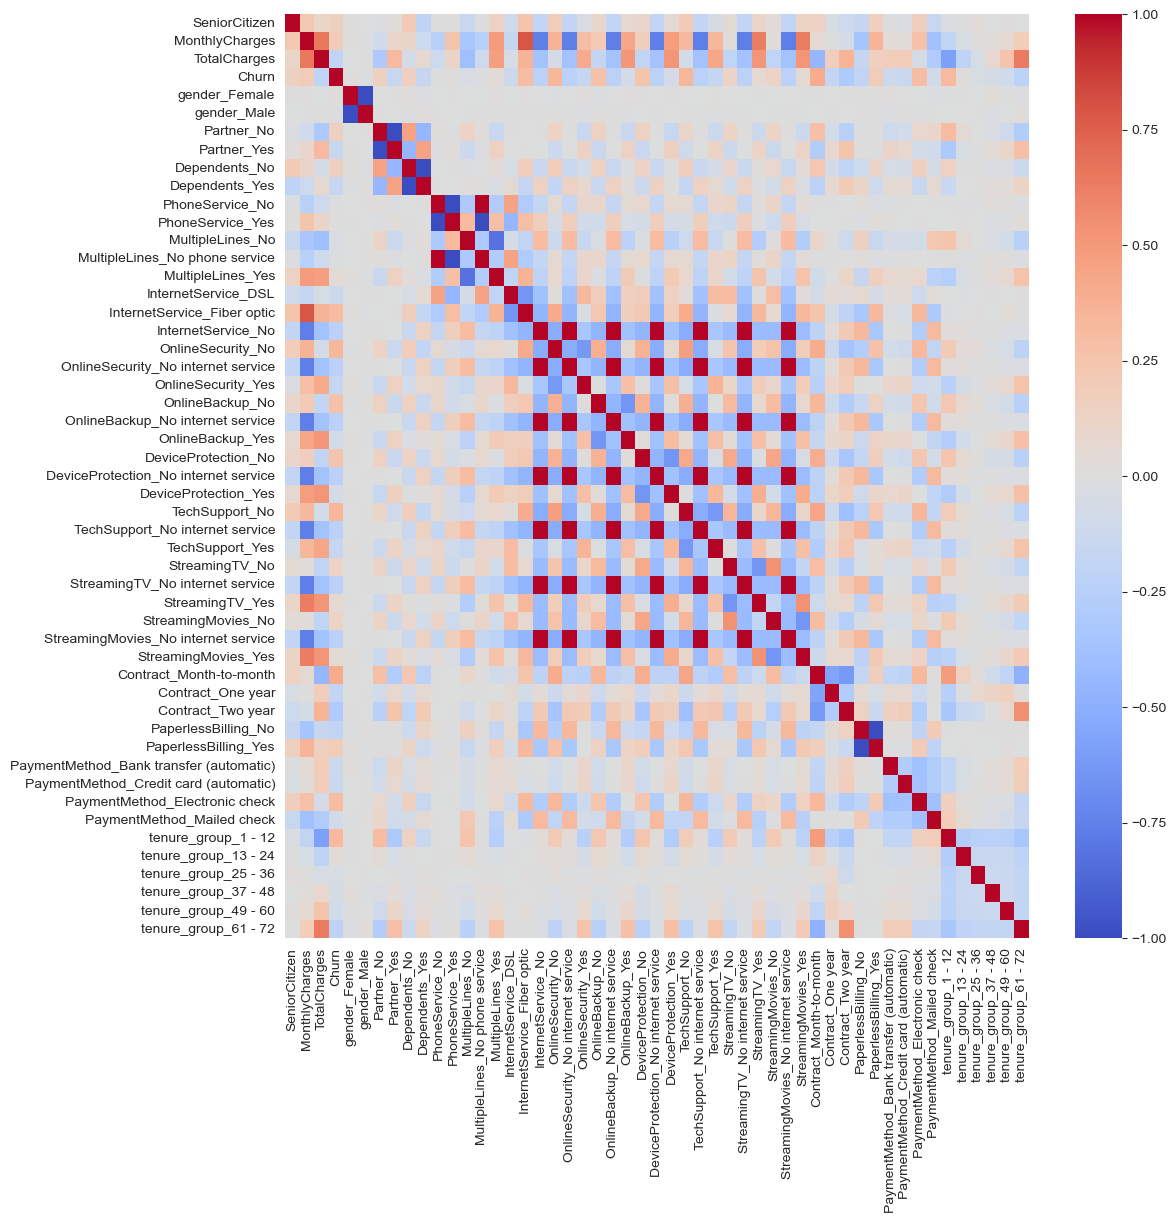

In [96]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(),cmap='coolwarm')

In [98]:
#BIVARIATE ANALYSIS
churners_df = df.loc[df_dummies['Churn']==1]
non_churners_df = df.loc[df_dummies['Churn']==0]
churners_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60


 I will now check if the type of internet service plays a role in customer churn. Specifically, I will analyze whether customers with different types of internet services (such as Fiber optic, DSL, etc.) are more or less likely to churn.

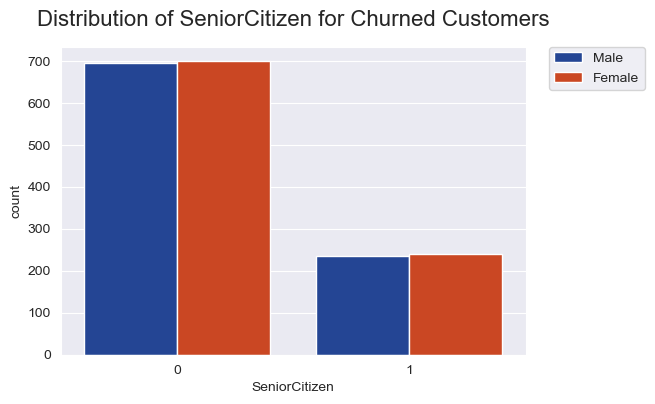

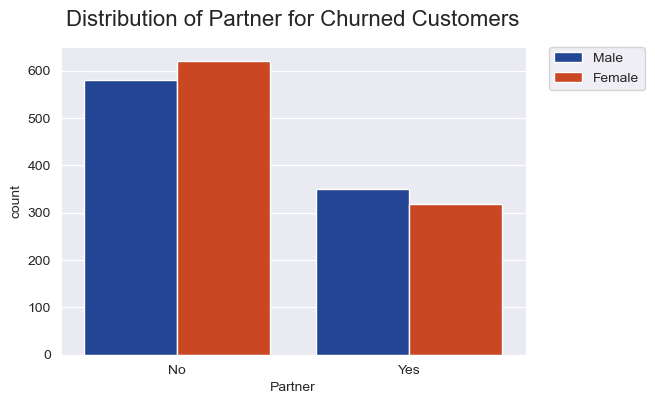

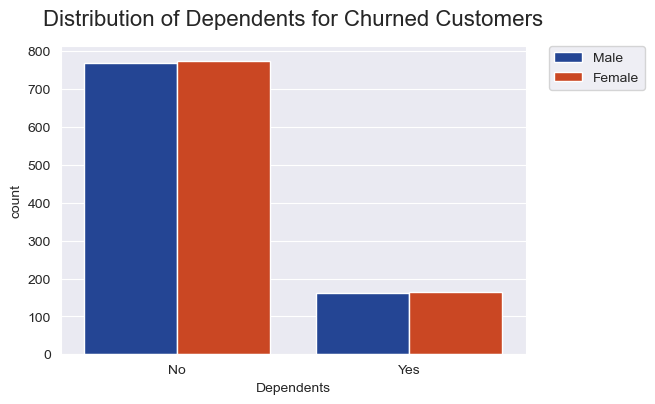

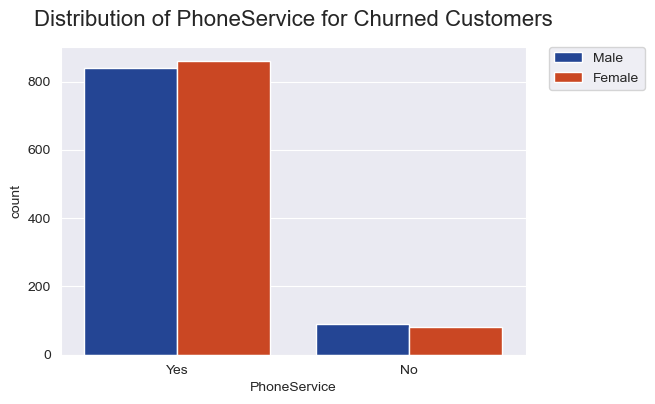

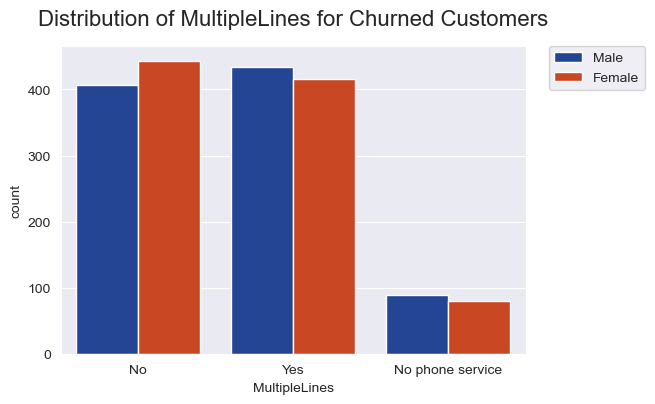

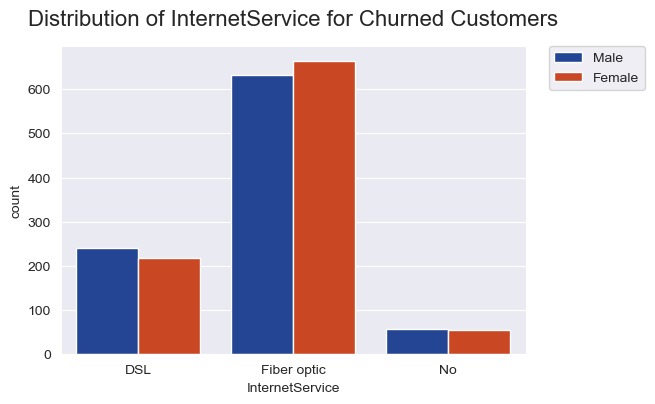

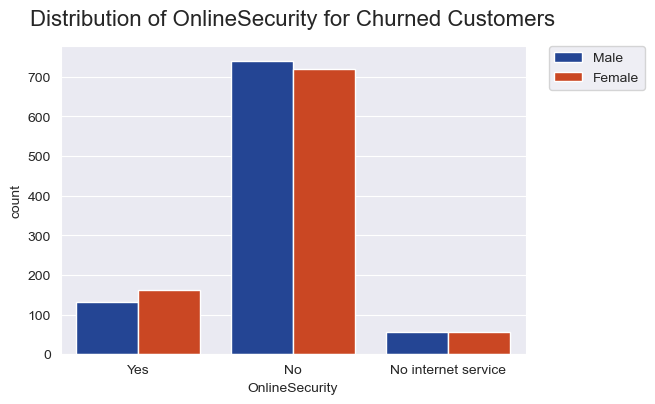

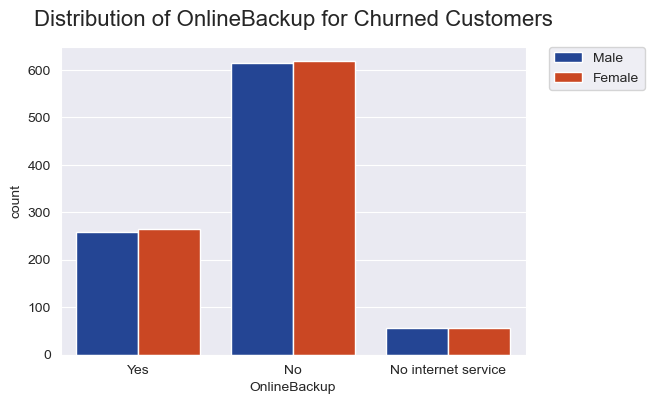

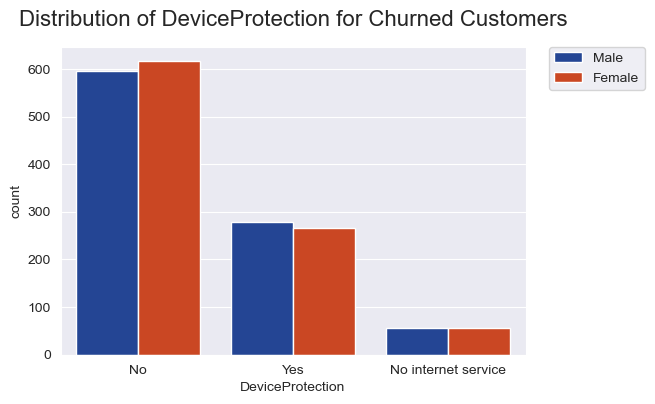

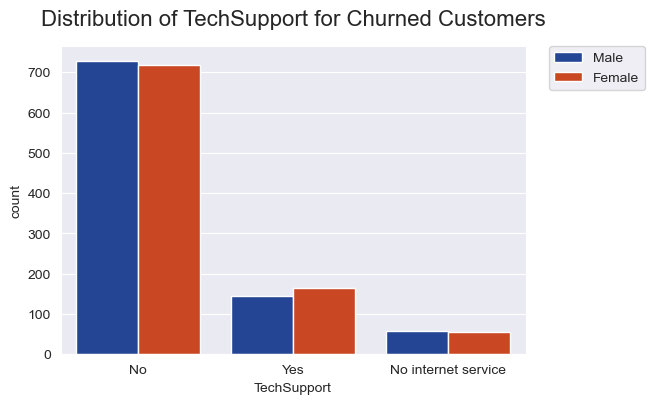

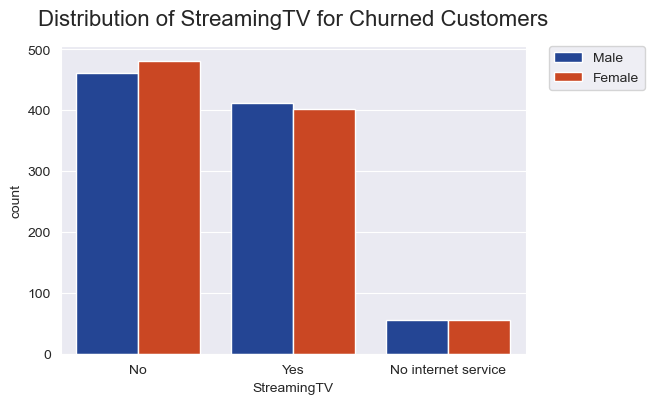

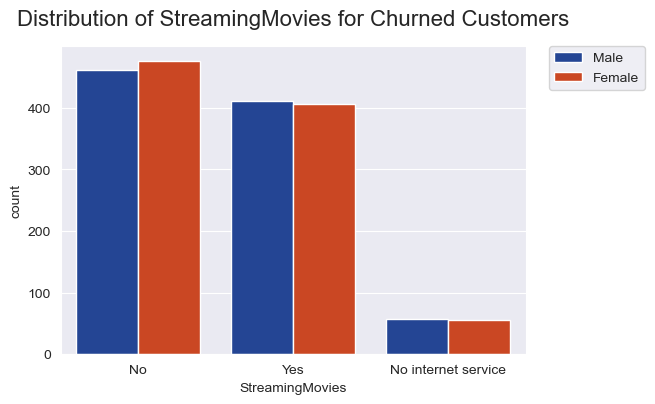

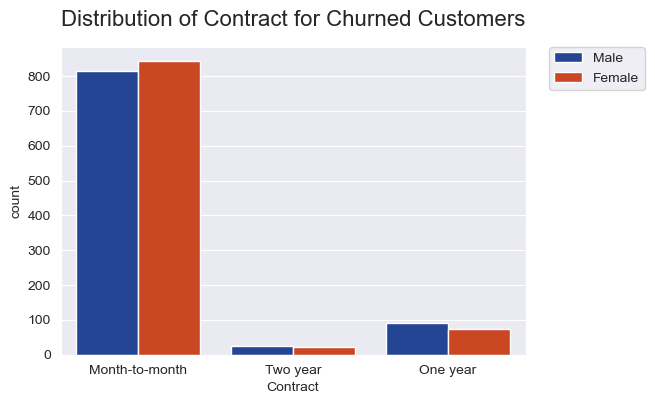

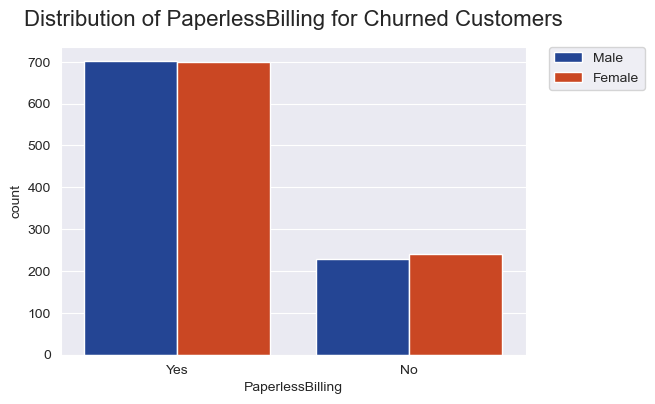

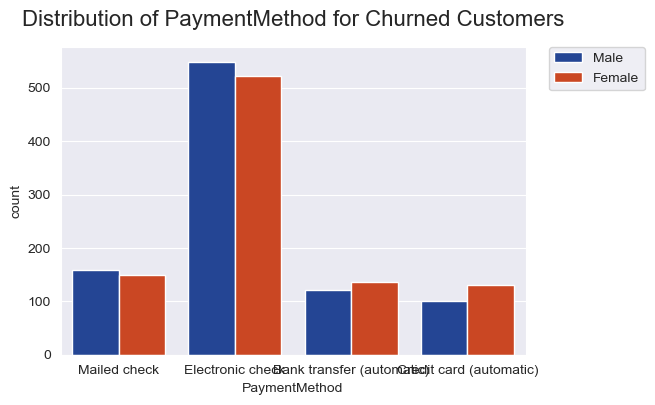

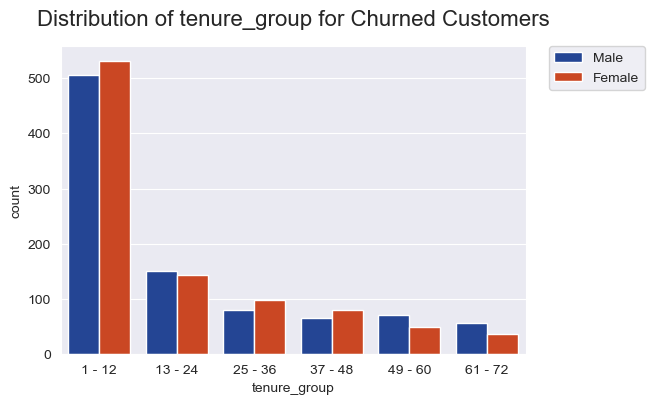

In [101]:
#Plotting the countplot of all important columns to gain insights


for i, predictor in enumerate(churners_df.drop(columns=['Churn','TotalCharges','MonthlyCharges','gender'])):
    plt.figure(i,figsize=(6,4))  
    plt.title("Distribution of {} for Churned Customers".format(predictor),fontsize='16')
    sns.countplot(data=churners_df,x=predictor,hue='gender')
    plt.tight_layout
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [103]:
#TRAINING THE MODEL TO PREDICT CHURNING
df_base =  pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",delimiter=',')
replaceStruct = {"Churn":     {"No": 0, "Yes": 1 }  }
oneHotCols = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines"
            ,"InternetService","OnlineSecurity","OnlineBackup",
            "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
            "Contract","PaperlessBilling","PaymentMethod"]

df2=df_base.replace(replaceStruct, inplace=True)
df2=pd.get_dummies(df_base, columns=oneHotCols)
pd.set_option('display.max_columns',100)
df2.head()

C:\Users\sabar\AppData\Local\Temp\ipykernel_5196\1786279194.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2=df_base.replace(replaceStruct, inplace=True)


,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,True,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,34,56.95,1889.5,0,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,2,53.85,108.15,1,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,45,42.30,1840.75,0,False,True,True,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,2,70.70,151.65,1,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False


In [105]:

df2['TotalCharges']=pd.to_numeric(df_base['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
df2.dropna(inplace=True)
df2=df2.drop('customerID',axis=1)
df2.to_csv(r'Telco-Customer-Predictions.csv')


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   bool   
 5   gender_Male                              7032 non-null   bool   
 6   SeniorCitizen_0                          7032 non-null   bool   
 7   SeniorCitizen_1                          7032 non-null   bool   
 8   Partner_No                               7032 non-null   bool   
 9   Partner_Yes                              7032 non-null   bool   
 10  Dependents_No                            7032 non-nul

In [109]:
df_dummies= pd.get_dummies(df2)
df_dummies

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,True,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,False,True,True,False,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,7362.90,0,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,346.45,0,True,False,True,False,False,True,False,True,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
7041,4,74.40,306.60,1,False,True,False,True,False,True,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True


In [111]:
X = df_dummies.drop('Churn',axis=1)
y = df_dummies['Churn']

In [113]:
#DECISION TREE CLASSIFIER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_leaf=8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)

In [115]:
y_pred = dt_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
dt = round(accuracy_score(y_test, y_pred)*100, 2)
dt

77.33

In [119]:
def print_report(model,X_test,y_test,y_pred):
    """
    returns the model score, confusion matrix and classfication report
    """
    print("Model Score : {} \n ".format(model.score(X_test, y_test)))
    print("Confusion Matrix : \n {}\n".format(confusion_matrix(y_test,y_pred)))
    print("Accuracy : {}".format( round(accuracy_score(y_test, y_pred)*100, 2)))
    print("Classification report : \n\n"+classification_report(y_test, y_pred, labels=[0,1]))

In [121]:
print_report(dt_model,X_test,y_test,y_pred)

Model Score : 0.7732764747690121 
 
Confusion Matrix : 
 [[944  65]
 [254 144]]

Accuracy : 77.33
Classification report : 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1009
           1       0.69      0.36      0.47       398

    accuracy                           0.77      1407
   macro avg       0.74      0.65      0.66      1407
weighted avg       0.76      0.77      0.75      1407



In [123]:
print("Before OverSampling- counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

print("After OverSampling with SMOTEENN - '1': {}".format(sum(y_resampled==1)))
print("After OverSampling with SMOTEENN - '0': {}".format(sum(y_resampled==0)))

Before OverSampling- counts of label '1': 1471
Before OverSampling- counts of label '0': 4154 

After OverSampling with SMOTEENN - '1': 2651
After OverSampling with SMOTEENN - '0': 2196


In [125]:
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=DecisionTreeClassifier(criterion = "gini",max_depth=3, min_samples_leaf=2)
model_dt_smote.fit(X_resampled,y_resampled)

yr_pred = model_dt_smote.predict(Xr_test)

print_report(model_dt_smote,Xr_test,yr_test,yr_pred)
dt_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)
#As we can see that the performance of the model has increased significantly after performing oversampling.

Model Score : 0.8958762886597939 
 
Confusion Matrix : 
 [[382  52]
 [ 49 487]]

Accuracy : 89.59
Classification report : 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       434
           1       0.90      0.91      0.91       536

    accuracy                           0.90       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.90      0.90      0.90       970



In [127]:
#LOGISTIC REGRESSION
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Using MinMaxScaler to scale the variables in logistic regression so that all of them are within a range of 0 to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


#Model fitting
model_lr = LogisticRegression(solver='lbfgs',max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print_report(model_lr,X_test,y_test,y_pred)
lr = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7746979388770433 
 
Confusion Matrix : 
 [[888 121]
 [196 202]]

Accuracy : 77.47
Classification report : 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1009
           1       0.63      0.51      0.56       398

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



C:\Users\sabar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
sm = SMOTEENN()

X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_lr_smote = LogisticRegression(solver='lbfgs',max_iter=1000)
model_lr_smote.fit(Xr_train,yr_train)

yr_pred = model_lr_smote.predict(Xr_test)
print_report(model_lr_smote,Xr_test,yr_test,yr_pred)
lr_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)
#The above two plots show us the positively and negatively correlated values other than tenure and Total charges with being the most negatively correlated feature and monthlazy contract is the most positively correlated feature w.r.t Churn

Model Score : 0.9436325678496869 
 
Confusion Matrix : 
 [[380  32]
 [ 22 524]]

Accuracy : 94.36
Classification report : 

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       412
           1       0.94      0.96      0.95       546

    accuracy                           0.94       958
   macro avg       0.94      0.94      0.94       958
weighted avg       0.94      0.94      0.94       958



C:\Users\sabar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
#RANDOM FOREST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model_rf=RandomForestClassifier(n_estimators=200, criterion='gini',max_depth=3, min_samples_leaf=2)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
print_report(model_rf,X_test,y_test,y_pred)
rf = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7604832977967306 
 
Confusion Matrix : 
 [[964  45]
 [292 106]]

Accuracy : 76.05
Classification report : 

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1009
           1       0.70      0.27      0.39       398

    accuracy                           0.76      1407
   macro avg       0.73      0.61      0.62      1407
weighted avg       0.75      0.76      0.72      1407



In [133]:
sm = SMOTEENN()

X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=200, criterion='gini', random_state = 100,max_depth=4, min_samples_leaf=8)

model_rf_smote.fit(Xr_train,yr_train)
yr_pred = model_rf_smote.predict(Xr_test)

print_report(model_rf_smote,Xr_test,yr_test,yr_pred)
rf_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.9256689791873142 
 
Confusion Matrix : 
 [[379  46]
 [ 29 555]]

Accuracy : 92.57
Classification report : 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       425
           1       0.92      0.95      0.94       584

    accuracy                           0.93      1009
   macro avg       0.93      0.92      0.92      1009
weighted avg       0.93      0.93      0.93      1009



In [135]:
Xr_train

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3606,0.138497,0.710813,0.116919,1.000000,0.000000,0.03335,0.96665,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.966650,0.000000,0.033350,0.000000
4784,0.133594,0.671496,0.103994,1.000000,0.000000,0.00000,1.00000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.902961,0.0,0.097039,1.0,0.0,0.0,0.000000,0.0,1.000000,0.902961,0.0,0.097039,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.902961,0.000000,0.097039
4620,0.435966,0.204460,0.142066,0.000000,1.000000,1.00000,0.00000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.140177,0.0,0.859823,0.0,0.0,1.0,0.140177,0.0,0.859823,1.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.859823,0.000000,0.140177,0.000000
3596,0.355466,0.753858,0.275977,0.920628,0.079372,0.00000,1.00000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,1.000000,1.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.000000
613,0.338028,0.023383,0.060316,0.000000,1.000000,1.00000,0.00000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000,0.0,1.0,0.0,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,0.191133,0.665715,0.140280,1.000000,0.000000,0.00000,1.00000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.0,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.000000
4067,0.102582,0.515779,0.064537,0.000000,1.000000,1.00000,0.00000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.141669,0.858331
373,0.239437,0.068657,0.052850,0.000000,1.000000,1.00000,0.00000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000
1709,0.788732,0.525871,0.475571,0.000000,1.000000,0.00000,1.00000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,1.000000,1.000000,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000


In [137]:
yr_pred= model_rf_smote.predict(Xr_test)
yr_pred[0:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [139]:
yr_pred = model_rf_smote.predict_proba(Xr_test)
yr_pred[0:5]

array([[0.03190449, 0.96809551],
       [0.08857893, 0.91142107],
       [0.93887607, 0.06112393],
       [0.03183212, 0.96816788],
       [0.24920249, 0.75079751]])

In [141]:
# APPLYING PCA
from sklearn.decomposition import PCA
pcas = PCA(0.9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

X_train_pca = pcas.fit_transform(X_train)
X_test_pca = pcas.transform(X_test)
model_pca=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=4, min_samples_leaf=8)
model_pca.fit(X_train_pca,y_train)

y_pred_pca = model_pca.predict(X_test_pca)

print_report(model_pca,X_test_pca,y_test,y_pred_pca)
pca = round(accuracy_score(y_test, y_pred_pca)*100, 2)

Model Score : 0.7491115849324804 
 
Confusion Matrix : 
 [[950  59]
 [294 104]]

Accuracy : 74.91
Classification report : 

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1009
           1       0.64      0.26      0.37       398

    accuracy                           0.75      1407
   macro avg       0.70      0.60      0.61      1407
weighted avg       0.73      0.75      0.71      1407



In [143]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train, Xr_test, yr_train, yr_test=train_test_split(X_resample, y_resample,test_size=0.2)
pcas = PCA(0.9)

Xr_train_pca = pcas.fit_transform(Xr_train)
Xr_test_pca = pcas.transform(Xr_test)
model_pca_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)
model_pca_smote.fit(Xr_train_pca,yr_train)

yr_pred_pca = model_pca_smote.predict(Xr_test_pca)

print_report(model_pca_smote,Xr_test_pca,yr_test,yr_pred_pca)
pca_smote = round(accuracy_score(yr_test, yr_pred_pca)*100, 2)

Model Score : 0.918407960199005 
 
Confusion Matrix : 
 [[399  49]
 [ 33 524]]

Accuracy : 91.84
Classification report : 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       448
           1       0.91      0.94      0.93       557

    accuracy                           0.92      1005
   macro avg       0.92      0.92      0.92      1005
weighted avg       0.92      0.92      0.92      1005



In [145]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model_xgb = XGBClassifier(n_estimators=200,max_depth=3)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

print_report(model_xgb,X_test,y_test,y_pred)
xgb = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score : 0.7640369580668088 
 
Confusion Matrix : 
 [[886 123]
 [209 189]]

Accuracy : 76.4
Classification report : 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1009
           1       0.61      0.47      0.53       398

    accuracy                           0.76      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407



In [147]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_xgb_smote= XGBClassifier(n_estimators=200,max_depth=3)
model_xgb_smote.fit(Xr_train, yr_train)
yr_pred = model_xgb_smote.predict(Xr_test)

print_report(model_xgb_smote,Xr_test,yr_test,yr_pred)
xgb_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

Model Score : 0.954228855721393 
 
Confusion Matrix : 
 [[406  24]
 [ 22 553]]

Accuracy : 95.42
Classification report : 

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       430
           1       0.96      0.96      0.96       575

    accuracy                           0.95      1005
   macro avg       0.95      0.95      0.95      1005
weighted avg       0.95      0.95      0.95      1005



C:\Users\sabar\AppData\Local\Temp\ipykernel_5196\3367151916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Smote_Accuracy_score', y='Model', palette='icefire_r',data=models.sort_values(by='Smote_Accuracy_score',


,Model,Accuracy_score,Smote_Accuracy_score
0,XGBoost,76.40,95.42
1,Logistic Regression,77.47,94.36
2,Random Forest,76.05,92.57
3,PCA,74.91,91.84
4,Decision trees,77.33,89.59


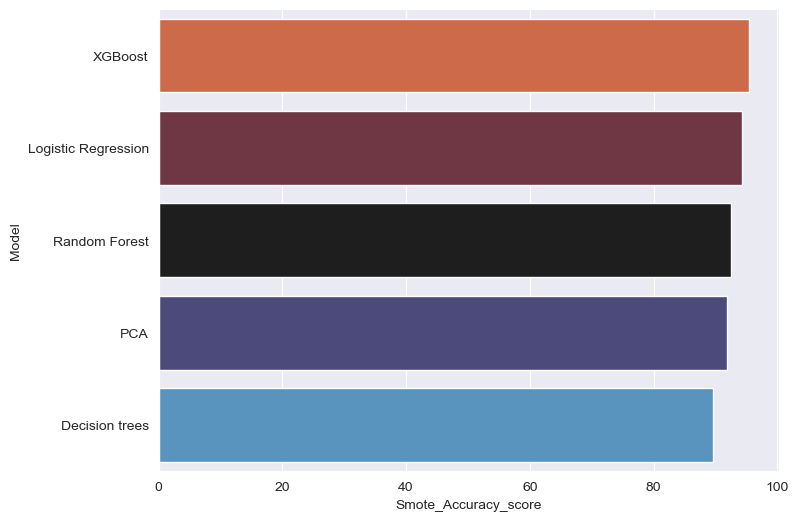

In [151]:
models = pd.DataFrame({
    'Model':['Decision trees', 'Logistic Regression', 'Random Forest', 'PCA', 'XGBoost'],
    'Accuracy_score' : [dt, lr, rf, pca, xgb],
    'Smote_Accuracy_score' : [dt_smote, lr_smote, rf_smote, pca_smote, xgb_smote]
})
sns.barplot(x='Smote_Accuracy_score', y='Model', palette='icefire_r',data=models.sort_values(by='Smote_Accuracy_score',
                                                                         ascending=False, ignore_index=True))

models.sort_values(by='Smote_Accuracy_score', ascending=False, ignore_index=True)

In [153]:
import pickle
# Lets dump our Random Forests model
pickle.dump(model_xgb_smote, open('model.pkl','wb'))

In [155]:
load_model2=pickle.load(open('model.pkl','rb'))
load_model2.score(Xr_test,yr_test)

0.954228855721393

In [157]:
model_xgb_smote.predict_proba(Xr_test)

array([[9.9953461e-01, 4.6538940e-04],
       [9.9918765e-01, 8.1235042e-04],
       [3.3974648e-05, 9.9996603e-01],
       ...,
       [9.2247939e-01, 7.7520594e-02],
       [1.0318267e-01, 8.9681733e-01],
       [2.9746890e-03, 9.9702531e-01]], dtype=float32)

In [161]:
# For Power BI predictions
telco_pred=  pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",delimiter=',')
telco_pred['TotalCharges']=pd.to_numeric(df_base['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
telco_pred.dropna(inplace=True)
pred=model_xgb_smote.predict_proba(X)[:,1]*100
telco_pred['Predictions']=pred
telco_pred.to_csv('Telco-Churn-Predictions.csv')

# POWERBI DASHBOARD

a) **Churners Profile**

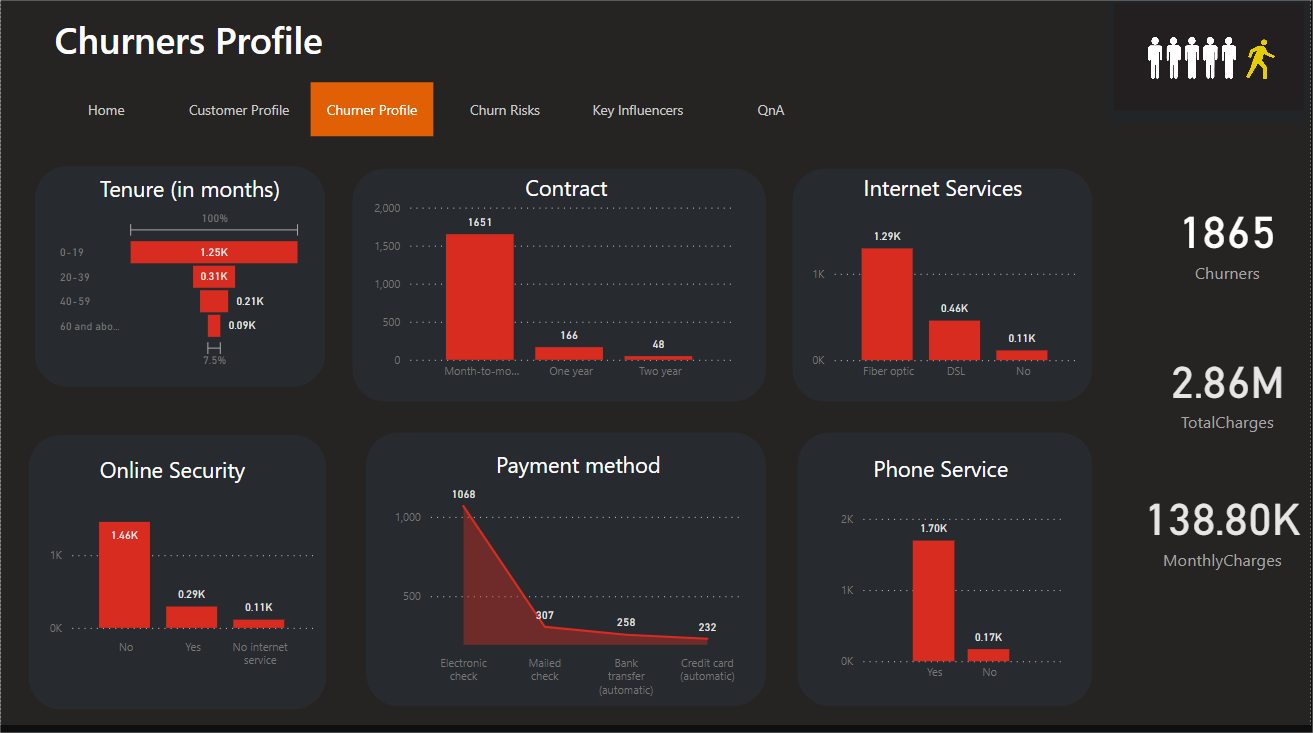





b) **Churn Risks for each customer (Predicted using XGBoost model)**

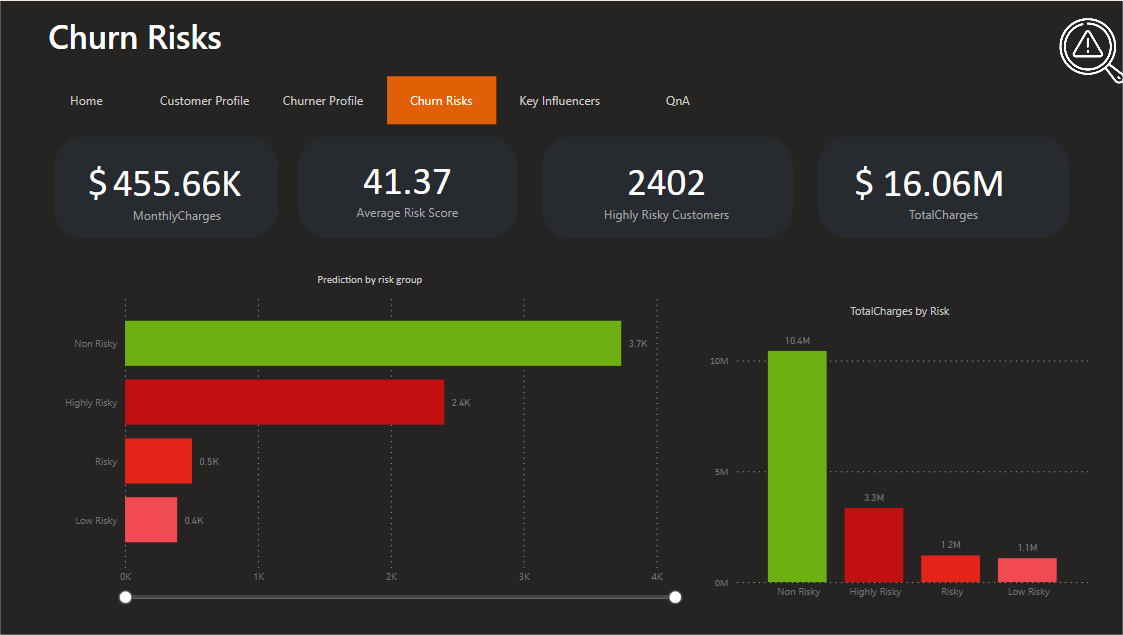

# The End.